In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('D:\projects/IRIS.csv')
print(data.shape) #how many data points & features

(150, 5)


In [3]:
print(data.columns) #column names of our data set

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
#(Q) How many data points for each class are present?
print(data["species"].value_counts())
#blanced data set VS imbalanced data sets
#IRIS data set is balanced as the number of data points for every class is same

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64


In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()  #to display stats about data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()  #to display basic infoabout data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#check for null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis 

<AxesSubplot:>

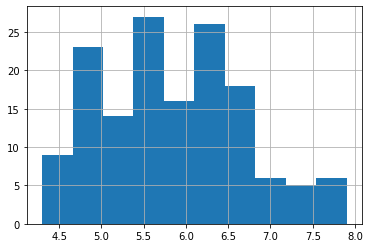

In [9]:
data['sepal_length'].hist()

<AxesSubplot:>

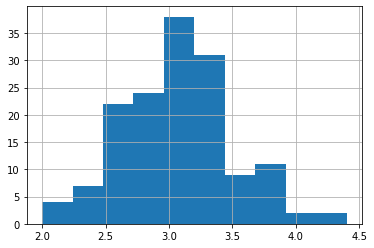

In [10]:
data['sepal_width'].hist()

<AxesSubplot:>

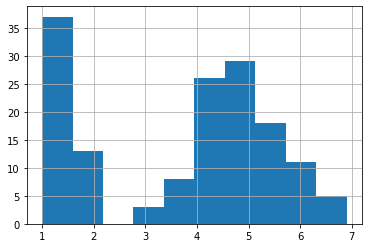

In [11]:
data['petal_length'].hist()

<AxesSubplot:>

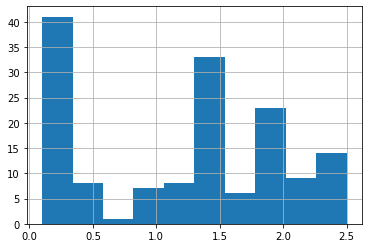

In [12]:
data['petal_width'].hist()

# 2-D Scatter Plot

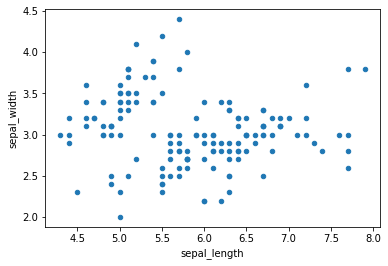

In [13]:
#2-D scatter plot:
#Always understand the axis:labels and scale
#This graph show the data point range of sepal length & width
data.plot(kind='scatter',x='sepal_length',y='sepal_width');
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


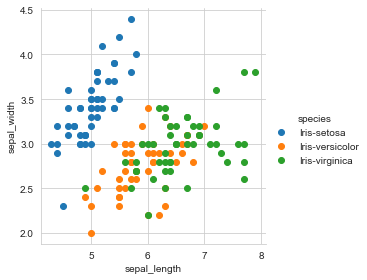

In [14]:
#2-D Scatter plot with color-coding for each flower type/class.
sns.set_style("whitegrid");
sns.FacetGrid(data,hue="species",size=4) \
   .map(plt.scatter,"sepal_length","sepal_width") \
   .add_legend();
plt.show();

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


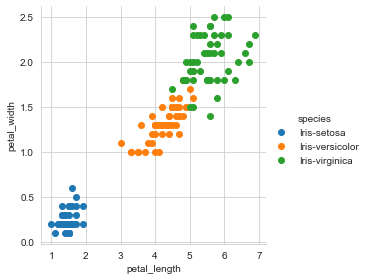

In [15]:
sns.set_style("whitegrid");
sns.FacetGrid(data,hue="species",size=4) \
   .map(plt.scatter,"petal_length","petal_width") \
   .add_legend();
plt.show();

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


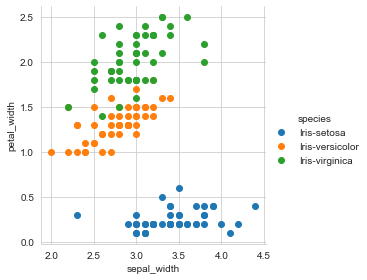

In [16]:
sns.set_style("whitegrid");
sns.FacetGrid(data,hue="species",size=4) \
   .map(plt.scatter,"sepal_width","petal_width") \
   .add_legend();
plt.show();

# Obsertvation:
1. Using sepal_length and sepal_width, we can distinguish Setosa flowers from others.
2. Setosa is linearly seperable, by drawing a line (y=mx+c).
3. Seperating Versicolor from Viginica is much harder as they have considerable overlap.


# Coorelation Matrix

A correlation mateix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.The values is in the range of -1 to 1.If two variables have high correlation,we can neglect one variable from those two.

In [17]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

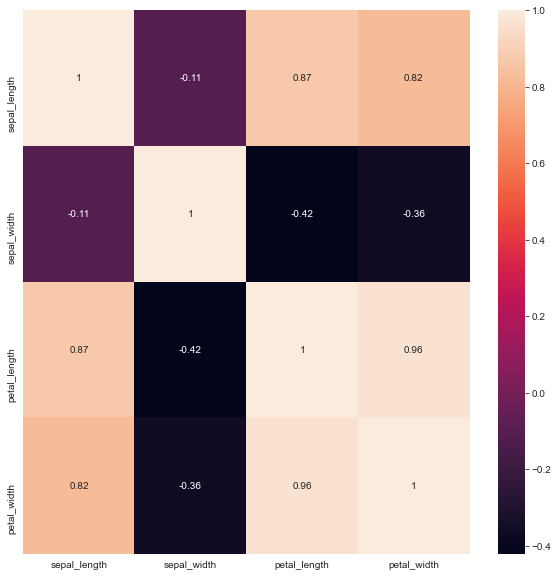

In [18]:
corr=data.corr()
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)

# Label Encoder

In machine learning,we usually deal with data sets which contains multiple labels in one or more than one columns.These labels can be in the form or numbers.Label Encoding refers to converting the labels into numeric form so as to convet it into the machine_readable form.

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
data['species']=le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [21]:
from sklearn.model_selection import train_test_split
#train-70
#test-30
X=data.drop(columns=['species'])
Y=data['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [23]:
#model Training
model.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [25]:
#Knn-K-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [26]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [28]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


# Pair-Plot

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


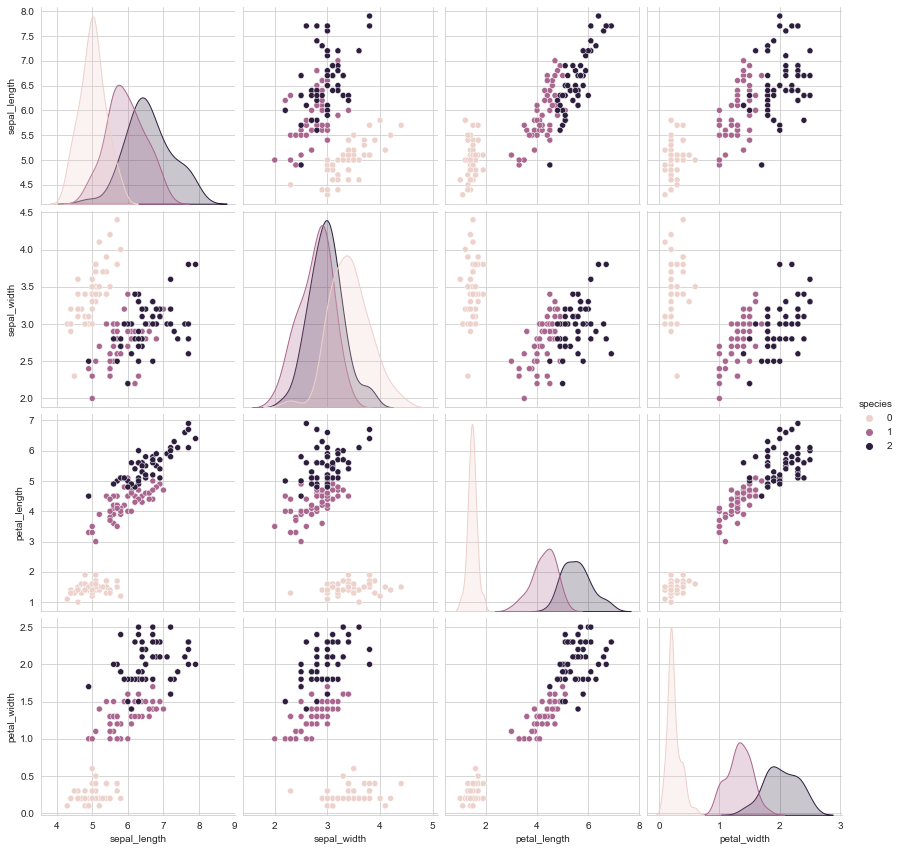

In [31]:
#pairwise scatter plot:Pair-plot
#Disadvantages:
##Can be used when number of features are high
#Cannot visualise higher dimensonal patterns in 3-D and 4-D.
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data,hue="species",size=3);
plt.show()